Handling Missing Data wit Pandas

In [1]:
import numpy as np
import pandas as pd

Pandas utility functions

In [2]:
pd.isnull(np.nan)

True

In [3]:
pd.isnull(None)

True

In [4]:
pd.isna(np.nan)

True

In [5]:
pd.isna(None)

True

The opposite ones also exist

In [6]:
pd.notnull(None)

False

In [7]:
pd.notnull(np.nan)

False

In [8]:
pd.notnull(3)

True

These Functions also work with Series and DataFrames

In [9]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [10]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [11]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    "Column B": [np.nan, 2, 3],
    "Column C": [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


Pandas Operations with Missing Values

In [12]:
pd.Series([1, 2, np.nan]).count()

2

In [13]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [14]:
pd.Series([1, 2, np.nan]).mean()

1.5

Filtering missing data

In [15]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [16]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [17]:
pd.notnull(s).sum()

4

In [18]:
pd.isnull(s).sum()

2

In [19]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [20]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [21]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [22]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

Dropping null values

In [23]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

Dropping null values on DataFrames

In [24]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 37, np.nan],
    "Column B": [2, 3, 31, np.nan],
    "Column C": [np.nan, 2, 57, 100],
    "Column D": [5, 8, 56, 77]
})

In [25]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,3.0,2.0,8
2,37.0,31.0,57.0,56
3,NaN,NaN,100.0,77


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [27]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [28]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [29]:
df.dropna()

,Column A,Column B,Column C,Column D
2,37.0,31.0,57.0,56


In [30]:
df.dropna(axis=1)  # axis='columns' also works

,Column D
0,5
1,8
2,56
3,77


In [31]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 37],
    "Column B": [2, np.nan, 31],
    "Column C": [np.nan, np.nan, 100]
})

In [32]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,37.0,31.0,100.0


In [33]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,3.0,2.0,8
2,37.0,31.0,57.0,56
3,NaN,NaN,100.0,77


In [34]:
df.dropna(how='any') # default behaviar

,Column A,Column B,Column C,Column D
2,37.0,31.0,57.0,56


In [35]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,3.0,2.0,8
2,37.0,31.0,57.0,56
3,NaN,NaN,100.0,77


In [36]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,3.0,2.0,8
2,37.0,31.0,57.0,56


In [37]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,3.0,2.0,8
2,31.0,57.0,56
3,NaN,100.0,77


Filling null values

In [38]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [39]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [40]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [41]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

Filling nulls with configuous (close) values

In [42]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [43]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [44]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [45]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

Filling null values on DataFrames

In [46]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,3.0,2.0,8
2,37.0,31.0,57.0,56
3,NaN,NaN,100.0,77


In [47]:
df.fillna({'Column A': 1, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,53.0,5
1,1.0,3.0,2.0,8
2,37.0,31.0,57.0,56
3,1.0,99.0,100.0,77


In [48]:
df.fillna(method='ffill', axis=0) # vertical filling

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,3.0,2.0,8
2,37.0,31.0,57.0,56
3,37.0,31.0,100.0,77


In [49]:
df.fillna(method='ffill', axis=1) # horizontal filling

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,3.0,2.0,8.0
2,37.0,31.0,57.0,56.0
3,NaN,NaN,100.0,77.0


Checking if there are NAs

In [50]:
s.dropna().count()

4

missing_values = len(s.dropna(1) += len(s)
missing_values

In [51]:
len(s)

6

In [52]:
s.count()

4

More Pythonic solutions any

In [53]:
pd.Series([True, False, False]).any()

True

In [54]:
pd.Series([True, False, False]).all()

False

In [55]:
pd.Series([True, True, True]).all()

True

The isnull methodreturned a Boolean Series with True values whenever there was a nan

In [56]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [57]:
pd.Series([1, np.nan]).isnull().any()

True

In [58]:
pd.Series([1, 2]).isnull().any()

False

In [59]:
s.isnull().any()

True

Cleaning invalid values

In [60]:
df = pd.DataFrame({
    'Sex': ['A', 'F', 'F', 'D', 'J'],
    'Age': [23, 34, 40, 27, 50],
})
df

,Sex,Age
0,A,23
1,F,34
2,F,40
3,D,27
4,J,50


In [61]:
df['Sex'].unique()

array(['A', 'F', 'D', 'J'], dtype=object)

In [62]:
df['Sex'].value_counts()

F    2
A    1
D    1
J    1
Name: Sex, dtype: int64

In [63]:
df['Sex'].replace('A','F')

0    F
1    F
2    F
3    D
4    J
Name: Sex, dtype: object

In [64]:
df['Sex'].replace('D', 'M')

0    A
1    F
2    F
3    M
4    J
Name: Sex, dtype: object

In [65]:
df['Sex'].replace('J','M')

0    A
1    F
2    F
3    D
4    M
Name: Sex, dtype: object

In [66]:
df['Sex'].replace({'A':'M', 'D':'M', 'J':'M'})

0    M
1    F
2    F
3    M
4    M
Name: Sex, dtype: object

In [67]:
df[df['Age'] > 40]

,Sex,Age
4,J,50


In [68]:
df.loc[df['Age'] > 40, 'Age']= df.loc[df['Age'] > 40, 'Age'] / 10
df

,Sex,Age
0,A,23
1,F,34
2,F,40
3,D,27
4,J,5


Duplicates

In [69]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United States',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gerard Depardie',
    'Anthony Blake',
    'Peter Maravich',
    'Eros Ramazoti',
    'Schmaichel Uve',
    'Nemo Mali',
    'Haike Drexler'
])

In [70]:
ambassadors

Gerard Depardie            France
Anthony Blake      United Kingdom
Peter Maravich      United States
Eros Ramazoti               Italy
Schmaichel Uve            Germany
Nemo Mali                 Germany
Haike Drexler             Germany
dtype: object

In [71]:
ambassadors.duplicated()

Gerard Depardie    False
Anthony Blake      False
Peter Maravich     False
Eros Ramazoti      False
Schmaichel Uve     False
Nemo Mali           True
Haike Drexler       True
dtype: bool

In [72]:
ambassadors.duplicated(keep='last')# last one is not duplicat

Gerard Depardie    False
Anthony Blake      False
Peter Maravich     False
Eros Ramazoti      False
Schmaichel Uve      True
Nemo Mali           True
Haike Drexler      False
dtype: bool

In [73]:
ambassadors.duplicated(keep=False) # 

Gerard Depardie    False
Anthony Blake      False
Peter Maravich     False
Eros Ramazoti      False
Schmaichel Uve      True
Nemo Mali           True
Haike Drexler       True
dtype: bool

In [74]:
ambassadors.drop_duplicates(keep=False)

Gerard Depardie            France
Anthony Blake      United Kingdom
Peter Maravich      United States
Eros Ramazoti               Italy
dtype: object

Duplicates in DataFrame

In [75]:
players = pd.DataFrame({
    'Name': ['Kobe',
            'Lebron',
            'Kobe',
            'Divac',
            'Johnson',
            ],
    'Points':[
        '56',
        '66',
        '56',
        '70',
        '40'
    ]
})

In [76]:
players

,Name,Points
0,Kobe,56
1,Lebron,66
2,Kobe,56
3,Divac,70
4,Johnson,40


In [77]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [78]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [79]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2    False
3    False
4    False
dtype: bool

Splitting Columns

In [80]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US_1',
        '1976?_M_US_1',
        '1953_F_US_5',
        '1946_M_SR_7',
        '1973_M_SR_7'
    ]
})

In [81]:
df

,Data
0,1987_M_US_1
1,1976?_M_US_1
2,1953_F_US_5
3,1946_M_SR_7
4,1973_M_SR_7


In [82]:
df['Data'].str.split('_')

0     [1987, M, US, 1]
1    [1976?, M, US, 1]
2     [1953, F, US, 5]
3     [1946, M, SR, 7]
4     [1973, M, SR, 7]
Name: Data, dtype: object

In [83]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1976?,M,US,1
2,1953,F,US,5
3,1946,M,SR,7
4,1973,M,SR,7


In [84]:
df = df['Data'].str.split('_', expand=True)

In [85]:
df

,0,1,2,3
0,1987,M,US,1
1,1976?,M,US,1
2,1953,F,US,5
3,1946,M,SR,7
4,1973,M,SR,7


In [86]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

In [87]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1976?,M,US,1
2,1953,F,US,5
3,1946,M,SR,7
4,1973,M,SR,7


In [88]:
df['Country'].str.contains('S')

0    True
1    True
2    True
3    True
4    True
Name: Country, dtype: bool

In [89]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [90]:
df['Country'].str.strip()

0    US
1    US
2    US
3    SR
4    SR
Name: Country, dtype: object

In [91]:
df['Country'].str.replace(' ', '')

0    US
1    US
2    US
3    SR
4    SR
Name: Country, dtype: object

More Visualizations

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Global API
Matplotlib's default pyplot API has a global MATLAB style interface, as we've already seen

In [96]:
x = np.arange(-10, 31)

In [97]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

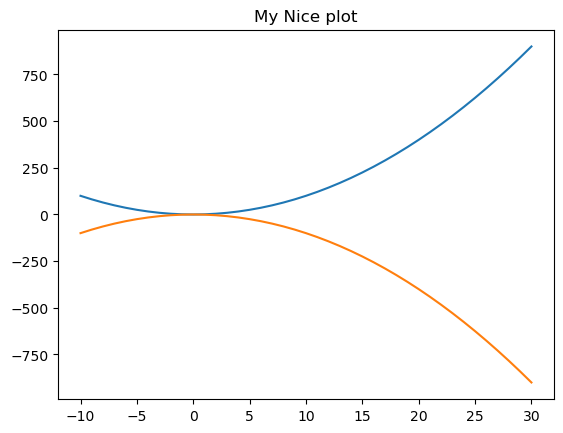

In [99]:
plt.title('My Nice plot')

plt.plot(x, x**2)
plt.plot(x, -1 * (x**2))

Text(0, 0.5, 'Y')

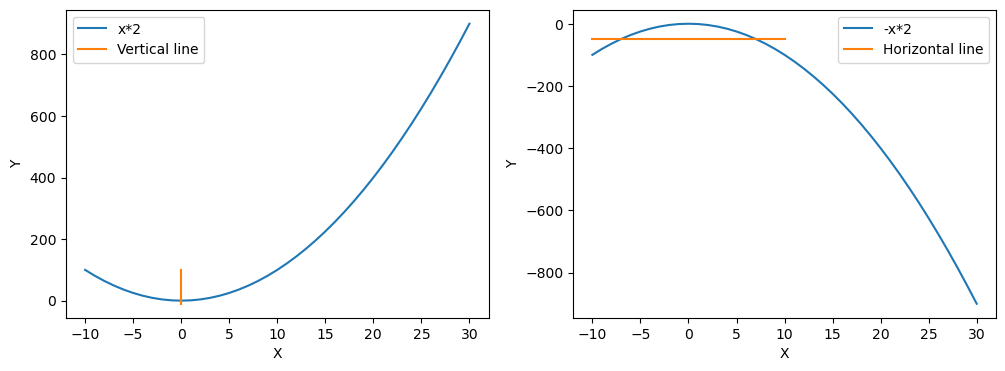

In [116]:
plt.figure(figsize=(12, 4))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1) # rows, columns panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['x*2', 'Vertical line'])
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.plot(x, -1 *(x**2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-x*2', 'Horizontal line'])

plt.xlabel('X')
plt.ylabel('Y')

Object Oriented Programing - Interface

NameError: name 'fig' is not defined

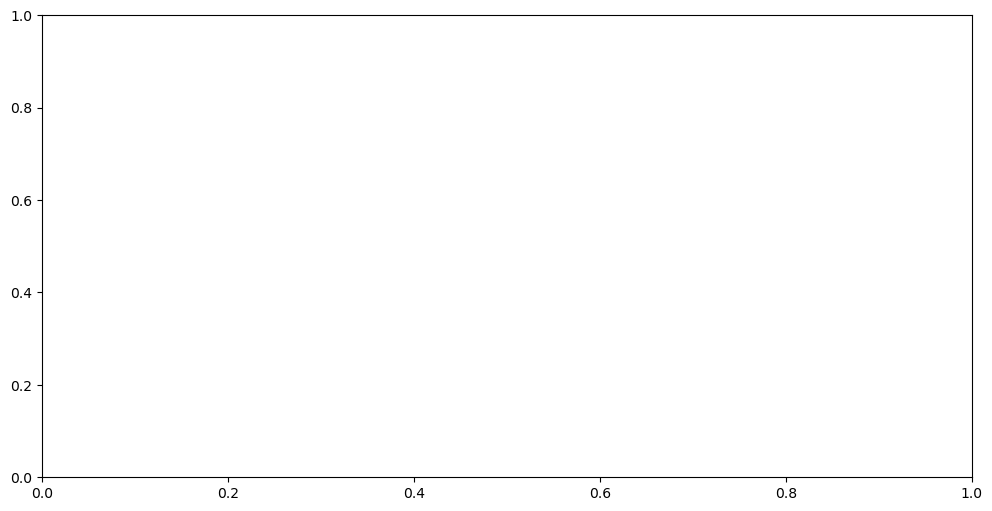

In [125]:
fig.axes = plt.subplots(figsize=(12, 6))

In [123]:
axes.plot(x, (x**2), color='red', linewidth=3,marker='0', markersize=0, label='-x*2')
    
axes.plot(x, -1 * (x**2), 'b==', label='-x*2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My nice plot")

axes.legend()

fiq

NameError: name 'axes' is not defined